# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
riskFactors<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")

In [2]:
# cogemos el nombre de las filas del datset, repitiendo segun el count y
# lo ponemos en un vector
indexDeRiskFactors <- rep(rownames(riskFactors),each=riskFactors$count)

Warning message in rep(rownames(riskFactors), each = riskFactors$count):
“first element used of 'each' argument”

In [3]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
n <- 5000
# hacemos un muestreo de 5000 muestras de el vector de indices

sampleIndexDeRiskFactor <- sample(indexDeRiskFactors, n)

In [4]:
#cogemos los datos del dataframe que nos indica el muestreo
riskFactor <- riskFactors[sampleIndexDeRiskFactor,]


El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [5]:
summary(riskFactor)

      year      age_group_5_years    race_eth     first_degree_hx
 Min.   :2000   Min.   : 1.000    Min.   :1.000   Min.   :0.00   
 1st Qu.:2002   1st Qu.: 5.000    1st Qu.:1.000   1st Qu.:0.00   
 Median :2004   Median : 7.000    Median :1.000   Median :0.00   
 Mean   :2004   Mean   : 7.173    Mean   :2.708   Mean   :0.81   
 3rd Qu.:2007   3rd Qu.: 9.000    3rd Qu.:5.000   3rd Qu.:1.00   
 Max.   :2009   Max.   :13.000    Max.   :9.000   Max.   :9.00   
  age_menarche   age_first_birth BIRADS_breast_density  current_hrt   
 Min.   :0.000   Min.   :0.000   Min.   :1.000         Min.   :0.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000         1st Qu.:0.000  
 Median :2.000   Median :3.000   Median :3.000         Median :0.000  
 Mean   :4.455   Mean   :4.006   Mean   :3.886         Mean   :2.421  
 3rd Qu.:9.000   3rd Qu.:9.000   3rd Qu.:4.000         3rd Qu.:9.000  
 Max.   :9.000   Max.   :9.000   Max.   :9.000         Max.   :9.000  
    menopaus       bmi_group        bioph

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [6]:
#cambiar desconocidos por NA
riskFactor$race_eth[riskFactor$race_eth == 9] <- NA
riskFactor$first_degree_hx[riskFactor$first_degree_hx == 9] <- NA
riskFactor$age_menarche[riskFactor$age_menarche == 9] <- NA
riskFactor$age_first_birth[riskFactor$age_first_birth == 9] <- NA
riskFactor$BIRADS_breast_density[riskFactor$BIRADS_breast_density == 9] <- NA
riskFactor$current_hrt[riskFactor$current_hrt == 9] <- NA
riskFactor$menopaus[riskFactor$menopaus == 9] <- NA
riskFactor$bmi_group[riskFactor$bmi_group == 9] <- NA
riskFactor$biophx[riskFactor$biophx == 9] <- NA
riskFactor$breast_cancer_history[riskFactor$breast_cancer_history == 9] <- NA

In [7]:
#se genera un campo númerico nuevo con la edad aproximada del grupo 
riskFactor$grupoEdad[riskFactor$age_group_5_years == 1] <- 25
riskFactor$grupoEdad[riskFactor$age_group_5_years == 2] <- 32
riskFactor$grupoEdad[riskFactor$age_group_5_years == 3] <- 37
riskFactor$grupoEdad[riskFactor$age_group_5_years == 4] <- 42
riskFactor$grupoEdad[riskFactor$age_group_5_years == 5] <- 47
riskFactor$grupoEdad[riskFactor$age_group_5_years == 6] <- 52
riskFactor$grupoEdad[riskFactor$age_group_5_years == 7] <- 57
riskFactor$grupoEdad[riskFactor$age_group_5_years == 8] <- 62
riskFactor$grupoEdad[riskFactor$age_group_5_years == 9] <- 67
riskFactor$grupoEdad[riskFactor$age_group_5_years == 10] <- 72
riskFactor$grupoEdad[riskFactor$age_group_5_years == 11] <- 77
riskFactor$grupoEdad[riskFactor$age_group_5_years == 12] <- 82
riskFactor$grupoEdad[riskFactor$age_group_5_years == 13] <- 87


In [8]:
#poner datos en valores descriptivos y no en números

#year_group_5_years	Edad (años) en grupos de 5 años	1 = Edad 18-29; 2 = Edad 30-34; 
# 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 
# 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 1] <- "18-29"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 2] <- "30-34"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 3] <- "35-39"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 4] <- "40-44"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 5] <- "45-49"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 6] <- "50-54"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 7] <- "55-59"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 8] <- "60-64"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 9] <- "65-69"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 10] <- "70-74"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 11] <- "75-79"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 12] <- "80-84"
riskFactor$age_group_5_years[riskFactor$age_group_5_years == 13] <- ">85"



# race_eth      1 = Non-Hispanic white; 2 = Non-Hispanic black; 
# 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 
# 9 = Desconocido
riskFactor$race_eth[riskFactor$race_eth == 1] <- "Non-Hispanic white"
riskFactor$race_eth[riskFactor$race_eth == 2] <- "Non-Hispanic black"
riskFactor$race_eth[riskFactor$race_eth == 3] <- "Asian/Pacific Islander"
riskFactor$race_eth[riskFactor$race_eth == 4] <- "Native American"
riskFactor$race_eth[riskFactor$race_eth == 5] <- "Hispanic"
riskFactor$race_eth[riskFactor$race_eth == 6] <- "Other/mixed"

# first_degree_hx	0 = No; 1 = Sí; 9 = Desconocido
riskFactor$first_degree_hx[riskFactor$first_degree_hx == 0] <- "No"
riskFactor$first_degree_hx[riskFactor$first_degree_hx == 1] <- "Si"

# Edad_menarche	0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
riskFactor$age_menarche[riskFactor$age_menarche == 0] <- ">=14"
riskFactor$age_menarche[riskFactor$age_menarche == 1] <- "12-13"
riskFactor$age_menarche[riskFactor$age_menarche == 2] <- "<12"

#Edad_first_birth	Edad (años) at first birth	0 = Edad < 20; 1 = Edad 20-24; 
# 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido
riskFactor$age_first_birth[riskFactor$age_first_birth == 0] <- "<20"
riskFactor$age_first_birth[riskFactor$age_first_birth == 1] <- "20-24"
riskFactor$age_first_birth[riskFactor$age_first_birth == 2] <- "25-29"
riskFactor$age_first_birth[riskFactor$age_first_birth == 3] <- ">30"
riskFactor$age_first_birth[riskFactor$age_first_birth == 4] <- "Nulliparous"

#BIRADS_breast_density	1 = Almost entirely fat; 
# 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido
riskFactor$BIRADS_breast_density[riskFactor$BIRADS_breast_density == 1] <- "Almost entirely fat"
riskFactor$BIRADS_breast_density[riskFactor$BIRADS_breast_density == 2] <- "Scattered fibroglandular densities"
riskFactor$BIRADS_breast_density[riskFactor$BIRADS_breast_density == 3] <- "Heterogeneously dense"
riskFactor$BIRADS_breast_density[riskFactor$BIRADS_breast_density == 4] <- "Extremely dense"

#current_hrt	0 = No; 1 = Sí; 9 = Desconocido
riskFactor$current_hrt[riskFactor$current_hrt == 0] <- "No"
riskFactor$current_hrt[riskFactor$current_hrt == 1] <- "Si"

#menopaus	Menopausal status	1 = Pre- or peri-menopausal; 2 = Post-menopausal; 
# 3 = Surgical menopause; 9 = Desconocido
riskFactor$menopaus[riskFactor$menopaus == 1] <- "Pre or Peri"
riskFactor$menopaus[riskFactor$menopaus == 2] <- "Post"
riskFactor$menopaus[riskFactor$menopaus == 3] <- "Surgical"

#bmi_group	Body mass index	1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido
riskFactor$bmi_group[riskFactor$bmi_group == 1] <- "10-24.99"
riskFactor$bmi_group[riskFactor$bmi_group == 2] <- "25-29.99"
riskFactor$bmi_group[riskFactor$bmi_group == 3] <- "30-34.99"
riskFactor$bmi_group[riskFactor$bmi_group == 4] <- ">35"

#biophx	Biopsia previa o aspiración	0 = No; 1 = Sí; 9 = Desconocido
riskFactor$biophx[riskFactor$biophx == 0] <- "No"
riskFactor$biophx[riskFactor$biophx == 1] <- "Si"

# breast_cancer_history	Cancer diagnosticado con anterioridad	0 = No; 1 = Sí; 9 = Desconocido
riskFactor$breast_cancer_history[riskFactor$breast_cancer_history == 0] <- "No"
riskFactor$breast_cancer_history[riskFactor$breast_cancer_history == 1] <- "Si"

In [9]:
#convertir en factores
riskFactor$age_group_5_years <- as.factor(riskFactor$age_group_5_years)
riskFactor$race_eth <- as.factor(riskFactor$race_eth)
riskFactor$first_degree_hx <- as.factor(riskFactor$first_degree_hx)
riskFactor$age_menarche <- as.factor(riskFactor$age_menarche)
riskFactor$age_first_birth <- as.factor(riskFactor$age_first_birth)
riskFactor$BIRADS_breast_density<- as.factor(riskFactor$BIRADS_breast_density)
riskFactor$current_hrt<- as.factor(riskFactor$current_hrt)
riskFactor$menopaus<- as.factor(riskFactor$menopaus)
riskFactor$bmi_group <- as.factor(riskFactor$bmi_group)
riskFactor$biophx <- as.factor(riskFactor$biophx)
riskFactor$breast_cancer_history <- as.factor(riskFactor$breast_cancer_history)

In [10]:
summary(riskFactor)


      year      age_group_5_years                   race_eth    first_degree_hx
 Min.   :2000   50-54  : 825      Asian/Pacific Islander: 500   No  :3390      
 1st Qu.:2002   45-49  : 686      Hispanic              : 701   Si  :1305      
 Median :2004   55-59  : 577      Native American       : 103   NA's: 305      
 Mean   :2004   60-64  : 536      Non-Hispanic black    : 350                  
 3rd Qu.:2007   40-44  : 533      Non-Hispanic white    :2733                  
 Max.   :2009   65-69  : 446      Other/mixed           : 275                  
                (Other):1397      NA's                  : 338                  
 age_menarche    age_first_birth                        BIRADS_breast_density
 <12  : 864   <20        : 753   Almost entirely fat               : 595     
 >=14 : 836   >30        : 606   Extremely dense                   : 432     
 12-13:1144   20-24      : 850   Heterogeneously dense             :1410     
 NA's :2156   25-29      : 562   Scattered fibro

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

In [11]:
riskFactor$edadFactor <- as.factor(riskFactor$grupoEdad)

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [12]:
# cargamos libreria y opciones de visualizacion
library("ggplot2")
options(repr.plot.height=4,repr.plot.width=6)

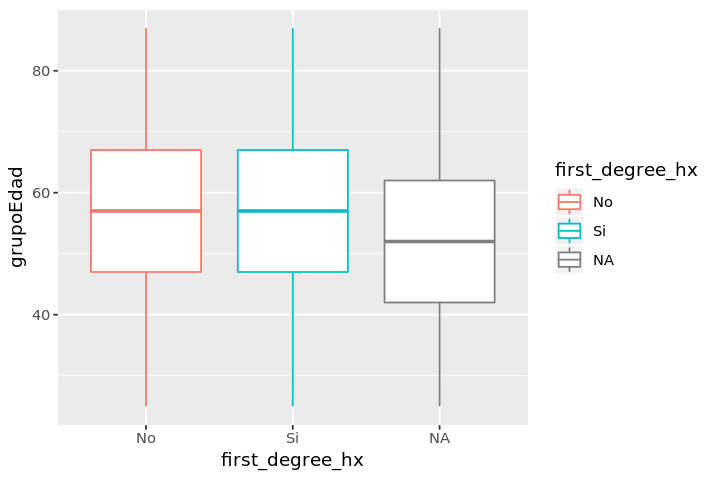

In [13]:
ggplot(data=riskFactor,aes(x=first_degree_hx, y=grupoEdad,color=first_degree_hx))+
     geom_boxplot()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

Para compararlo haria un test **t-student**, que compara las medias de dos grupos para saber si son iguales

In [14]:
#separamos los dos grupos
conAntecedentes = subset(riskFactor, first_degree_hx == "Si")
sinAntecedentes = subset(riskFactor, first_degree_hx == "No")


t.test(conAntecedentes$grupoEdad, sinAntecedentes$grupoEdad)


	Welch Two Sample t-test

data:  conAntecedentes$grupoEdad and sinAntecedentes$grupoEdad
t = 2.8015, df = 2312.6, p-value = 0.00513
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3720517 2.1082047
sample estimates:
mean of x mean of y 
 59.05517  57.81504 


In [15]:
# el test nos dice que tenemos que rechazar la hipotesis nula y podemos 
# afirmar que provienen de distintas poblaciones, es decir
# los antecedentes SI que tienen relacion con la edad de aparicion del cancer

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

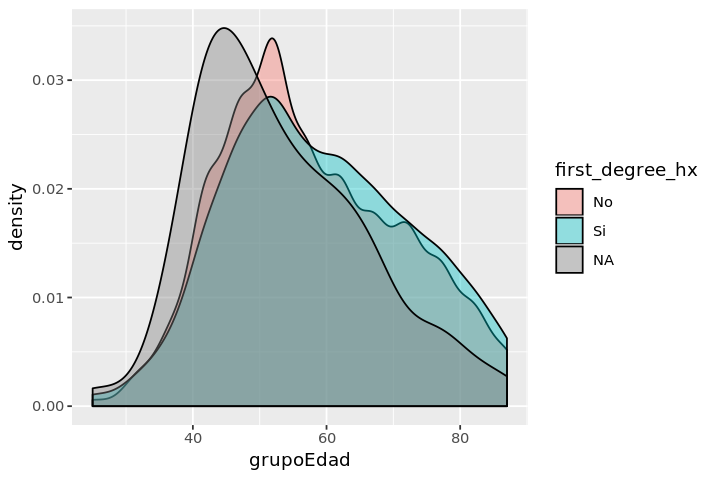

In [16]:
#curvas de densidad
ggplot(riskFactor, aes(x=grupoEdad, fill=first_degree_hx)) +
  geom_density(alpha=0.4)

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancer (BIRADS).

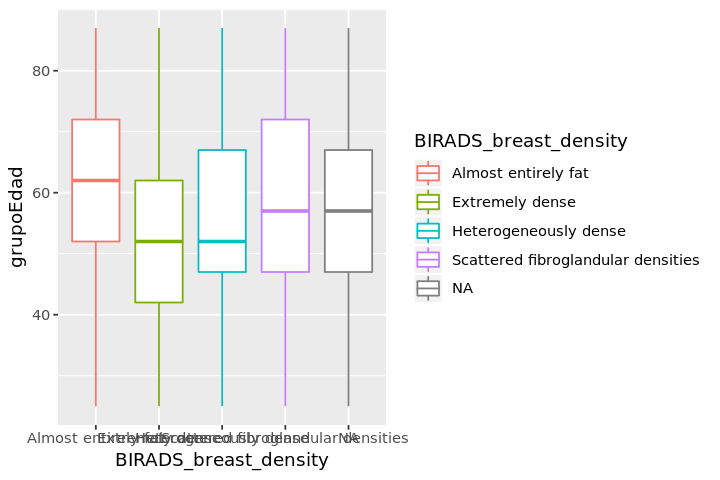

In [17]:
ggplot(data=riskFactor,aes(x=BIRADS_breast_density, y=grupoEdad,color=BIRADS_breast_density))+
     geom_boxplot()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [18]:
#Separamos el dataset en distintos subconjuntos

casiGrasa = subset(riskFactor, BIRADS_breast_density == "Almost entirely fat")
muyDenso = subset(riskFactor, BIRADS_breast_density == "Extremely dense")
heteroDenso = subset(riskFactor, BIRADS_breast_density == "Heterogeneously dense")
fibroDenso = subset(riskFactor, BIRADS_breast_density == "Scattered fibroglandular densities")



Usando fuerza bruta, podriamos hacer 6 t-test entre cada uno de los datasets, lo cual es poco practico. La siguiente opción seria realizar un test ANOVA, lo que requiere que las muestras sigan una distribución normal, lo que tratamos de ver realizando el test de Shapiro.

In [19]:
#comprobamos la normalidad de las muestras
shapiro.test(casiGrasa$grupoEdad)
shapiro.test(muyDenso$grupoEdad)
shapiro.test(heteroDenso$grupoEdad)
shapiro.test(fibroDenso$grupoEdad)


	Shapiro-Wilk normality test

data:  casiGrasa$grupoEdad
W = 0.97308, p-value = 5.386e-09



	Shapiro-Wilk normality test

data:  muyDenso$grupoEdad
W = 0.94893, p-value = 4.69e-11



	Shapiro-Wilk normality test

data:  heteroDenso$grupoEdad
W = 0.96217, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  fibroDenso$grupoEdad
W = 0.96836, p-value < 2.2e-16


La distribución no es normal en ninguno de los casos, así que la siguiente opcion es realizar un test **Kruskal-Wallis**

In [20]:
kruskal.test(grupoEdad ~ BIRADS_breast_density, data = riskFactor)


	Kruskal-Wallis rank sum test

data:  grupoEdad by BIRADS_breast_density
Kruskal-Wallis chi-squared = 130.44, df = 3, p-value < 2.2e-16


Como el p-value es menor que el nivel de significancia 0.05, podemos concluir que **HAY** diferencias entre los tipos de tumores y la edad de deteccion.

#### Tablas de contingencia: BIRADS

In [21]:
#Creamos las distintas tablas de contingencia
t <- table(riskFactor$BIRADS_breast_density)
total <- t[1] + t[2] + t[3] +t[4] 
probabilidad <- matrix(c(t,t/total), nrow=4, 
                       dimnames=list(c("Fat","Extremely Dense","HeteroDense","ScatterDense"),
                                     c("valor", "probabilidad")))

In [22]:
aT <- table(riskFactor$BIRADS_breast_density, riskFactor$first_degree_hx)
antecTumor <- matrix(aT, nrow=4,dimnames=list(c("Fat","Extremely Dense","HeteroDense","ScatterDense"),
                                              c("No","Si")))

In [23]:
tR <- table(riskFactor$BIRADS_breast_density, riskFactor$race_eth)
razaTumor <- matrix(tR, nrow=4, dimnames=list(c("Fat","Extremely Dense","HeteroDense","ScatterDense"),
                                              c("Asian","Hispanic","Native","Black","White","Other")))

In [24]:
probabilidad
antecTumor
razaTumor

,valor,probabilidad
Fat,595,0.1528384
Extremely Dense,432,0.1109684
HeteroDense,1410,0.3621885
ScatterDense,1456,0.3740046


,No,Si
Fat,431,135
Extremely Dense,303,104
HeteroDense,938,392
ScatterDense,985,396


,Asian,Hispanic,Native,Black,White,Other
Fat,24,87,18,51,355,23
Extremely Dense,53,44,4,29,249,26
HeteroDense,160,186,18,84,780,84
ScatterDense,103,225,30,109,794,88


¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

No, de la tabla de probabilidad se observa que los canceres HeteroDensos y los ScatterDense son mas probables que los ExtremlyDense o los de MostlyFat. Para comprobarlo usamos un test de **Homogeneidad**

In [25]:
chisq.test(probabilidad[,1])


	Chi-squared test for given probabilities

data:  probabilidad[, 1]
X-squared = 883.46, df = 3, p-value < 2.2e-16


El p-value para aceptar la hipótesis nula es muy bajo, así que podemos descartar $H_0$ y suponer que no todos los canceres son equiprobables.

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

El más comun es el *"Scattered fibroglandular densities"* seguido de *"Heterogeneously dense"*  con una proporcion del 37,4% y 36,2% respectivamente.

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [26]:
chisq.test(antecTumor)


	Pearson's Chi-squared test

data:  antecTumor
X-squared = 7.7787, df = 3, p-value = 0.05081


El p-value para aceptar la hipótesis nula es bajo, así que con un 95% podemos descartar  𝐻0  y suponer que **SI** dependen de los antecedentes familiares. Si quisiesemos un nivel mayor a un 95% no lo podriamos asegurar.

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [27]:
chisq.test(razaTumor)


	Pearson's Chi-squared test

data:  razaTumor
X-squared = 64.765, df = 15, p-value = 3.756e-08


El p-value para aceptar la hipótesis nula es muy bajo, así que podemos descartar  𝐻0  y suponer que no todos los canceres son equiprobables. Y **SI** dependen del gripo etnico

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [28]:
razaTumorTotal <- addmargins(razaTumor, FUN = list(Total = sum), quiet = TRUE)
razaTumorTotal

,Asian,Hispanic,Native,Black,White,Other,Total
Fat,24,87,18,51,355,23,558
Extremely Dense,53,44,4,29,249,26,405
HeteroDense,160,186,18,84,780,84,1312
ScatterDense,103,225,30,109,794,88,1349
Total,340,542,70,273,2178,221,3624


In [29]:
pNativeFat <- razaTumorTotal["Fat","Native"] / razaTumorTotal["Total","Native"]

paste("La probabilidad de que si un Nativo Americano tiene cancer de pecho este sea de tipo `Almost entirely Fat` es de ",
      round(pNativeFat,4)*100,"%")

[1] "La probabilidad de que si un Nativo Americano tiene cancer de pecho este sea de tipo `Almost entirely Fat` es de  25.71 %"

Ahora, y simplemente por curiosidad voy a intentar calcular la probabilidad de que si lo que se ha diagnosticado es un cancer tipo Fat, el paciente sea Nativo Americano.

Aplicando Bayes:

\\[
P(Fat|Native American)=\frac{P(Native American|Fat)·P_{apriori}(Fat)}{P(Native American)}
\\]


In [30]:
razaTumorProb <- prop.table(razaTumor)
razaTumorProbTotal <- addmargins(razaTumorProb, FUN = list(Total = sum), quiet = TRUE)
razaTumorProbTotal

,Asian,Hispanic,Native,Black,White,Other,Total
Fat,0.006622517,0.02400662,0.004966887,0.014072848,0.09795806,0.006346578,0.1539735
Extremely Dense,0.014624724,0.01214128,0.001103753,0.008002208,0.06870861,0.007174393,0.1117550
HeteroDense,0.044150110,0.05132450,0.004966887,0.023178808,0.21523179,0.023178808,0.3620309
ScatterDense,0.028421634,0.06208609,0.008278146,0.030077263,0.21909492,0.024282561,0.3722406
Total,0.093818985,0.14955850,0.019315673,0.075331126,0.60099338,0.060982340,1.0000000


In [31]:
pDeFat <- razaTumorProbTotal["Fat","Total"]
pDeNative <- razaTumorProbTotal ["Total","Native"]
pDeNativeFat <- razaTumorProbTotal["Fat","Native"]


In [32]:
res <- pDeNativeFat* pDeFat / pDeNative
paste("Si el cancer detectado es de tipo Fat, la probabilidad de que el paciente sea un Nativo Americano es aproximadamente",
      round(res,4)*100,"%")

[1] "Si el cancer detectado es de tipo Fat, la probabilidad de que el paciente sea un Nativo Americano es aproximadamente 3.96 %"